In [4]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
total_df = pd.read_csv('../data1/total_df.csv')
review_df = pd.read_csv('../data2/review_df.csv')

In [5]:
review_df.head()

,merchant,user_name,user_rank,num_response,user_star,time,rating,content
0,1984,2018.05.10,22,58,2.5,2024.04.21.,5.0,"까페에서 책 읽기를 좋아하는 사람인데요. 매우 쾌적하고 음악으로, 다른 손님 때문에..."
1,1984,ㅇㅅㅇ,2,3,2.3,2024.03.22.,1.0,NaN
2,1984,맛난곳만리뷰,7,7,5.0,2024.02.10.,5.0,다양한 볼거리들 있어서 좋아요 분위기도 괜찮구여
3,1984,진아,25,58,4.6,2024.02.05.,4.0,넓고 음료 ㄱㅊ앉아있기 좋음뭐 살 것도 있음
4,1984,박찬찬,27,71,3.9,2023.12.16.,1.0,"분위기는 좋으나, 장사할 생각 없어보임커피값도 비싼 편인데 돈값 못함카페는 부수적인..."


In [6]:
total_df

,merchant,category,star,address,oper_time,starCount,reviewCount
0,피오니 홍대점,카페,3.8,서울마포구 독막로7길51 1층(우)04043,매일 12:00 ~ 21:00\r\n\r\n매일 라스트오더 ~ 20:30,274,642
1,943킹스크로스,테마카페,4.1,"서울마포구 양화로16길24 지하1층,1~4층(우)04039",월~목 11:30 ~ 21:30\r\n\r\n금~일 10:00 ~ 21:30,360,191
2,카미야,"돈까스,우동",4.2,서울마포구 와우산로21길28-6 지하1층(우)04040,매일 11:00 ~ 21:30\r\n\r\n매일 라스트오더 ~ 21:00,191,426
3,우와 홍대본점,일식,3.4,서울마포구 와우산로21길21-16 2층202호(우)04041,매일 12:00 ~ 22:00월~금 휴게시간 14:30 ~ 17:00,168,624
4,칸다소바 홍대점,일본식라면,4.3,서울마포구 와우산로51-6 1층(우)04049,매일 10:30 ~ 21:30\r\n\r\n월~토 휴게시간 16:00 ~ 17:00...,280,439
...,...,...,...,...,...,...,...
220,키즈나,일본식주점,4.2,서울마포구 와우산로29바길6 지층(우)04053,화~일 17:00 ~ 02:00,29,51
221,앤디스커피,카페,3.3,"서울마포구 와우산로35길75 2,3층(우)04052","월~금 10:00 ~ 23:00\r\n\r\n토,일 11:00 ~ 23:00",30,3
222,델문도,카페,2.9,서울마포구 잔다리로19-6 2층(우)04048,"월~금 13:00 ~ 21:00\r\n\r\n토,일 12:00 ~ 21:00",64,90
223,스노브,디저트카페,3.5,서울마포구 와우산로59 (우)04049,매일 11:00 ~ 23:00,47,30


In [7]:
from konlpy.tag import Okt
import re

## 단어 추출
# Initialize the Okt object
okt = Okt()

# content 결측치 행 제거
review_df_clean = review_df.dropna(subset=['content'])

## content에서 키워드 추출
def preprocess_text(text):
    # 알파벳이 아닌 문자 정규화 및 제거
    text = re.sub("[^가-힣a-zA-Z ]", "", text)
    # 토큰화, 명사추출
    tokens = okt.nouns(text)  # 명사 추출
    tokens = [n for n in tokens if len(n) > 1]  # 길이가 2이상인 단어만 추출
    return tokens

# 추출한 단어(keywords) 열 생성
review_df_clean['keywords'] = review_df_clean['content'].apply(preprocess_text)


review_df_clean[['content', 'keywords']].head()

,content,keywords
0,"까페에서 책 읽기를 좋아하는 사람인데요. 매우 쾌적하고 음악으로, 다른 손님 때문에...","[까페, 사람, 매우, 음악, 다른, 손님, 때문, 방해, 한번, 커피, 메뉴, 리..."
2,다양한 볼거리들 있어서 좋아요 분위기도 괜찮구여,"[볼거리, 분위기]"
3,넓고 음료 ㄱㅊ앉아있기 좋음뭐 살 것도 있음,[음료]
4,"분위기는 좋으나, 장사할 생각 없어보임커피값도 비싼 편인데 돈값 못함카페는 부수적인...","[분위기, 장사, 생각, 보임, 커피, 돈값, 카페, 부수, 수입]"
5,작년까지 아메리카노도 수준급으로 맛있었는데 왜이리 변했나요 .. 손님이 오면 인사는...,"[작년, 아메리카노, 수준, 손님, 인사, 커녕, 인사, 해도, 대충, 사장]"


In [8]:
a = '아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓'
a = a.replace(" ", ",")

In [9]:
## 불용어 제거

from collections import Counter

# 불용어 정의
stopwords = [a,'맛있어요', '맛있고', '좋아요', '맛', '맛은', '맛이', '좋고', '안', '엄청', '맛있게', '맛도', '다른', '먹고', 
    '분위기', '맛있음', '맛있었어요', '같아요', '여기', '그리고','여기', '맛', '너무', '진짜', '다', '좀', '정말', '잘', '더', '그냥', '또', '것', '수', '많이', '꼭', '이', '거', '것은', '에서', '에는', 
    '있습니다', '있어', '있는', '입니다', '하는', '하기', '하고', '했어요', '했습니다', '한', '할', '합니다', '해', '해요', 
    '으로', '로는', '와', '과', '도', '고', '에', '에게', '와서', '와의', '으로부터', '이다', '있다', '되다', '같다']

# 불용어 제거
review_df_clean['filtered_words'] = review_df_clean['keywords'].apply(lambda words: [word for word in words if word not in stopwords])

# 빈도수 계산
filtered_words = [word for sublist in review_df_clean['filtered_words'] for word in sublist]
filtered_word_counts = Counter(filtered_words)

# 가장 많이 나온 20개 단어
filtered_word_counts.most_common(20)

[('직원', 1740),
 ('방문', 1327),
 ('가격', 1287),
 ('음식', 1002),
 ('사장', 972),
 ('홍대', 958),
 ('피자', 956),
 ('맛집', 933),
 ('사람', 908),
 ('라멘', 887),
 ('정도', 875),
 ('서비스', 819),
 ('최고', 816),
 ('추천', 807),
 ('생각', 802),
 ('곱창', 708),
 ('메뉴', 705),
 ('시간', 692),
 ('웨이', 680),
 ('느낌', 669)]

In [10]:
## 가중치 계산
# 유의어 그룹 정의
synonym_groups = {
    "western": ["양식","피자","파스타","버거","샐러드","스테이크","화덕","시카고피자","레스토랑","피클"],
    "japan": ["일식","라멘","우동","튀김","초밥","츠케멘","소바","차슈","카츠","회"],
    "service": ["서비스","친절","퀄리티","위생","설명","상태","관리","청결","정성","합리"],
    "location": ["스타일","컨셉","인스타","특색","감성","뷰","테라스","테마","야외","예술"],
    "meat": ["고기","곱창","돼지","닭갈비","등심","갈비","대창","삼겹살","육즙","양고기"],
    "alchol": ["술","국물","안주","맥주","술집","막걸리","소주","한잔","생맥주", "칵테일"],
    "cafe": ["카페","딸기","케이크","음료","빵","디저트","라떼","빙수","케익","생크림"],
    "time": ["시간","근처","거리","동네","예약","대기","웨이팅","주변","멀리","가까"]
}

# 각 리뷰의 단어 목록에서 그룹 단어의 빈도를 계산하는 함수 (횟수에 따라 0,1,2 식으로 출력)
def calculate_group_weights(words, group_words):
    return sum(word in group_words for word in words)

# 각 그룹에 위 함수 적용
for group_name, group_words in synonym_groups.items():
    review_df_clean[group_name] = review_df_clean['filtered_words'].apply(lambda words: calculate_group_weights(words, group_words))

# 음식점별로 빈도를 다 더한다.
grouped_weights = review_df_clean.groupby('merchant')[list(synonym_groups.keys())].sum()

# 가중치 계산
normalized_weights = grouped_weights.div(review_df_clean.groupby('merchant').size(), axis=0)


normalized_weights_reset = normalized_weights.reset_index()
normalized_weights_reset.head()

,merchant,western,japan,service,location,meat,alchol,cafe,time
0,1984,0.000000,0.000000,0.063492,0.222222,0.000000,0.015873,0.571429,0.158730
1,21세기 우리바다수산,0.000000,0.090909,0.181818,0.000000,0.000000,0.022727,0.000000,0.272727
2,38도씨식당,0.307692,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000
3,943킹스크로스,0.000000,0.006211,0.031056,0.111801,0.003106,0.077640,0.549689,0.055901
4,가로수포차,0.333333,0.000000,0.250000,0.083333,0.083333,0.416667,0.000000,0.000000


In [ ]:
# normalized_weights_reset.to_csv('../data2/weights.csv', index=False)

In [11]:
from scipy.stats import pearsonr
import numpy as np

In [12]:
### 유사도 비교


# 모든 음식점 쌍 별로 피어슨 상관 계수를 계산하는 함수
def pearson_correlation_matrix(df):
    # Number of merchants
    n = df.shape[0]
    # Initialize the correlation matrix
    correlation_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                data_i = df.iloc[i, 1:].values
                data_j = df.iloc[j, 1:].values
                correlation, _ = pearsonr(data_i, data_j)
                correlation_matrix[i, j] = correlation
            else:
                correlation_matrix[i, j] = 1  # 자기 자신 상관계수는 1
    return correlation_matrix

# Calculate the Pearson correlation matrix
correlation_matrix = pearson_correlation_matrix(normalized_weights_reset)

correlation_matrix

array([[ 1.        , -0.1258035 , -0.29907038, ..., -0.31724098,
        -0.3732846 , -0.20629136],
       [-0.1258035 ,  1.        , -0.16890769, ..., -0.16045149,
         0.23341702,  0.50467209],
       [-0.29907038, -0.16890769,  1.        , ..., -0.2372895 ,
        -0.24557394, -0.07057202],
       ...,
       [-0.31724098, -0.16045149, -0.2372895 , ...,  1.        ,
         0.03738847, -0.29740896],
       [-0.3732846 ,  0.23341702, -0.24557394, ...,  0.03738847,
         1.        , -0.04373735],
       [-0.20629136,  0.50467209, -0.07057202, ..., -0.29740896,
        -0.04373735,  1.        ]])

In [13]:
## p-value까지
import numpy as np
from scipy.stats import pearsonr

def pearson_correlation_and_p_value_matrix(df):
    # Number of merchants
    n = df.shape[0]
    # Initialize the correlation matrix and the p-value matrix
    correlation_matrix = np.zeros((n, n))
    p_value_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                data_i = df.iloc[i, 1:].values
                data_j = df.iloc[j, 1:].values
                correlation, p_value = pearsonr(data_i, data_j)
                correlation_matrix[i, j] = correlation
                p_value_matrix[i, j] = p_value
            else:
                correlation_matrix[i, j] = 1  # 자기 자신 상관계수는 1
                p_value_matrix[i, j] = 0  # 자기 자신 p-value는 0
    
    return correlation_matrix, p_value_matrix

correlation_matrix, p_value_matrix = pearson_correlation_and_p_value_matrix(normalized_weights_reset)


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# p-value 매트릭스 시각화
def visualize_p_value_matrix(p_value_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(p_value_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'p-value'})
    plt.title('P-value Matrix Heatmap')
    plt.show()


# p-value가 0.05보다 작은 상관계수 찾기
def significant_correlations(correlation_matrix, p_value_matrix, threshold=0.05):
    significant_vals = correlation_matrix[(p_value_matrix < threshold) & (np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))]
    return significant_vals

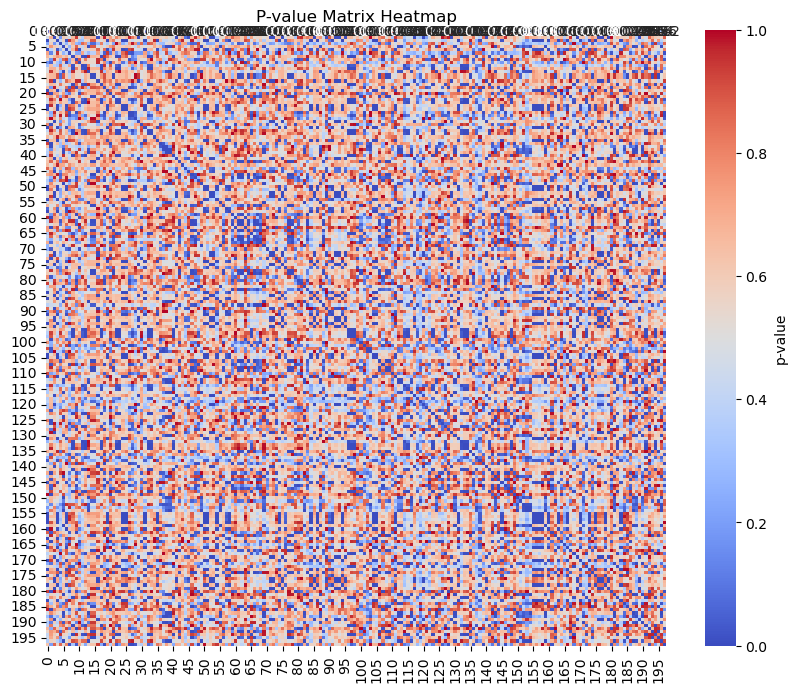

In [14]:
visualize_p_value_matrix(p_value_matrix)

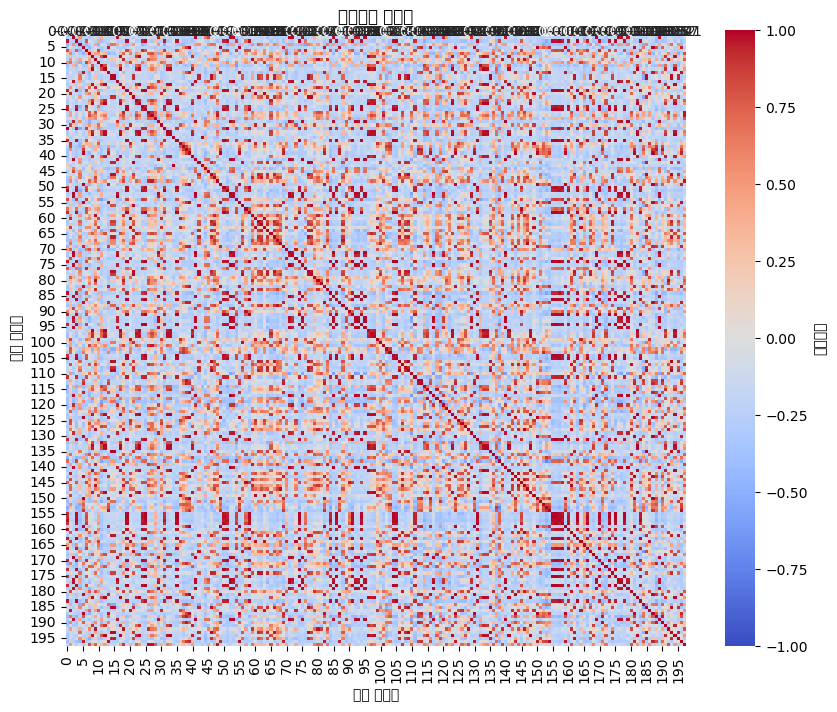

In [50]:
# 상관계수 매트릭스 시각화
def visualize_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
                cbar_kws={'label': '상관계수'}, fmt=".2f")
    plt.title('상관계수 히트맵')
    plt.xlabel('상인 인덱스')
    plt.ylabel('상인 인덱스')
    plt.show()

# 상관계수 매트릭스 시각화 함수 실행
visualize_correlation_matrix(correlation_matrix)

In [17]:
significant_vals = significant_correlations(correlation_matrix, p_value_matrix)
print("p-value가 0.05보다 작은 피어슨 상관계수들:", significant_vals)

p-value가 0.05보다 작은 피어슨 상관계수들: [0.95645833 0.8186818  0.93488131 ... 0.93316317 0.80331323 0.9292015 ]


In [47]:
significant_vals.shape

(2358,)

In [27]:
# 피어슨 상관계수가 0.71 이상이면서 p-value가 0.05 이상인 값을 찾는 함수
def find_high_correlation_low_significance(correlation_matrix, p_value_matrix):
    # 상관계수 조건과 p-value 조건을 만족하는 위치 찾기
    condition = (correlation_matrix >= 0.71) & (p_value_matrix >= 0.05)
    
    # 조건에 맞는 상관계수와 해당하는 p-value 추출
    correlations = correlation_matrix[condition]
    p_values = p_value_matrix[condition]
    
    # 결과 출력
    if correlations.size > 0:
        for corr, p_val in zip(correlations, p_values):
            print(f"상관계수: {corr}, p-value: {p_val}")
    else:
        print("해당하는 값이 없습니다.")

# 함수 실행
find_high_correlation_low_significance(correlation_matrix, p_value_matrix)

해당하는 값이 없습니다.


In [11]:
np.save('./p_value_matrix.npy', p_value_matrix)

In [13]:
np.save('../data2/cor.npy', correlation_matrix)

In [43]:
## 단순 유사도 높은 10개 식당 출력
def find_similar_restaurants1(restaurant_name, weights_path, cor_path, top_n=10):
    # 데이터 로드
    weights_df = pd.read_csv(weights_path)
    cor_matrix = np.load(cor_path)
    
    # 음식점 이름 목록 가져오기
    restaurant_names = weights_df['merchant'].values
    
    # 주어진 음식점의 인덱스 찾기
    if restaurant_name in restaurant_names:
        idx = np.where(restaurant_names == restaurant_name)[0][0]
        
        # 유사도 점수와 인덱스 가져오기
        similarity_scores = cor_matrix[idx]
        
        # 유사도에 따라 인덱스 정렬 및 상위 N개 선택
        sorted_indices = np.argsort(similarity_scores)[::-1]
        top_indices = sorted_indices[1:top_n+1]  # 자기 자신 제외
        
        # 결과 출력
        print(f"Top {top_n} restaurants similar to {restaurant_name}:")
        for i in top_indices:
            print(f"{restaurant_names[i]} - Similarity: {similarity_scores[i]}")
    else:
        print(f"Restaurant name '{restaurant_name}' not found in the list.")

In [68]:
find_similar_restaurants1('우와 홍대본점','../data2/weights.csv','../data2/cor.npy')

Top 10 restaurants similar to 우와 홍대본점:
바다회사랑 2호점 - Similarity: 0.898316433534355
철인7호치킨 홍대점 - Similarity: 0.8898529205414702
큐브이스케이프 홍대점 - Similarity: 0.8881338696260055
김앤김대게 서교점 - Similarity: 0.8757118051300735
비트포비아 홍대던전점 - Similarity: 0.8736806003403319
버터밀크 - Similarity: 0.8575991429814891
또보겠지떡볶이집 붕붕허니비점 - Similarity: 0.8563992740083956
홍대반지카페 본점 - Similarity: 0.8329680765402735
와우끝집 - Similarity: 0.8301782917694744
21세기 우리바다수산 - Similarity: 0.8103552491428314


In [27]:
weights_df = pd.read_csv('../data2/weights.csv')

In [28]:
weights_df

,merchant,western,japan,service,location,meat,alchol,cafe,time
0,1984,0.000000,0.000000,0.063492,0.222222,0.000000,0.015873,0.571429,0.158730
1,21세기 우리바다수산,0.000000,0.090909,0.181818,0.000000,0.000000,0.022727,0.000000,0.272727
2,38도씨식당,0.307692,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000
3,943킹스크로스,0.000000,0.006211,0.031056,0.111801,0.003106,0.074534,0.549689,0.055901
4,가로수포차,0.333333,0.000000,0.250000,0.083333,0.083333,0.416667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
193,홍익닭한마리 홍대본점,0.000000,0.000000,0.062500,0.000000,0.000000,0.468750,0.000000,0.000000
194,황곱 홍대점,0.000000,0.000000,0.110063,0.006918,0.502516,0.086164,0.000629,0.054088
195,효봉포차,0.000000,0.066667,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000
196,후라토식당 상수직영점,0.018868,0.509434,0.094340,0.037736,0.150943,0.000000,0.000000,0.113208


In [30]:
total_df = pd.read_csv('../data1/total_df.csv')
total_df['star']

0      3.8
1      4.1
2      4.2
3      3.4
4      4.3
      ... 
220    4.2
221    3.3
222    2.9
223    3.5
224    0.0
Name: star, Length: 225, dtype: float64

In [60]:
total_df_claen = pd.read_csv('../data1/total_df_clean.csv')

In [61]:
total_df_claen

,merchant,category,star,address,oper_time,starCount,reviewCount
0,피오니 홍대점,카페,3.8,서울마포구 독막로7길51 1층(우)04043,매일 12:00 ~ 21:00\r\n\r\n매일 라스트오더 ~ 20:30,274,642
1,943킹스크로스,테마카페,4.1,"서울마포구 양화로16길24 지하1층,1~4층(우)04039",월~목 11:30 ~ 21:30\r\n\r\n금~일 10:00 ~ 21:30,360,191
2,카미야,"돈까스,우동",4.2,서울마포구 와우산로21길28-6 지하1층(우)04040,매일 11:00 ~ 21:30\r\n\r\n매일 라스트오더 ~ 21:00,191,426
3,우와 홍대본점,일식,3.4,서울마포구 와우산로21길21-16 2층202호(우)04041,매일 12:00 ~ 22:00월~금 휴게시간 14:30 ~ 17:00,168,624
4,칸다소바 홍대점,일본식라면,4.3,서울마포구 와우산로51-6 1층(우)04049,매일 10:30 ~ 21:30\r\n\r\n월~토 휴게시간 16:00 ~ 17:00...,280,439
...,...,...,...,...,...,...,...
193,와우끝집,회,3.9,서울마포구 와우산로156 2층(우)04061,월~토 17:00 ~ 22:00,37,93
194,키즈나,일본식주점,4.2,서울마포구 와우산로29바길6 지층(우)04053,화~일 17:00 ~ 02:00,29,51
195,앤디스커피,카페,3.3,"서울마포구 와우산로35길75 2,3층(우)04052","월~금 10:00 ~ 23:00\r\n\r\n토,일 11:00 ~ 23:00",30,3
196,델문도,카페,2.9,서울마포구 잔다리로19-6 2층(우)04048,"월~금 13:00 ~ 21:00\r\n\r\n토,일 12:00 ~ 21:00",64,90


In [46]:
def find_similar_restaurants2(restaurant_name, weights_path, cor_path, top_n=10, weight_similarity=0.7, weight_stars=0.3):
    # 데이터 로드
    weights_df = pd.read_csv(weights_path)
    cor_matrix = np.load(cor_path)
    total_df = pd.read_csv('../data1/total_df_clean.csv')
    
    # 음식점 이름과 별점 목록 가져오기
    restaurant_names = weights_df['merchant'].values
    stars = total_df['star'].values  # 별점 데이터
    
    # 주어진 음식점의 인덱스 찾기
    if restaurant_name in restaurant_names:
        idx = np.where(restaurant_names == restaurant_name)[0][0]
        
        # 유사도 점수와 인덱스 가져오기
        similarity_scores = cor_matrix[idx]

        # 자기 자신을 결과에서 제외
        similarity_scores[idx] = -np.inf
        
        # 종합 점수 계산: 유사도 점수와 별점을 가중치로 조정
        normalized_stars = (stars / stars.max())  # 별점 정규화
        total_scores = weight_similarity * similarity_scores + weight_stars * normalized_stars
        
        # 종합 점수에 따라 인덱스 정렬 및 상위 N개 선택
        sorted_indices = np.argsort(total_scores)[::-1][:top_n]
        
         # 결과 출력
        print(f"Top {top_n} restaurants similar to {restaurant_name} based on similarity and stars:")
        for i in sorted_indices:
            print(f"{restaurant_names[i]} - Total Score: {total_scores[i]}, Similarity: {similarity_scores[i]}, Stars: {stars[i]}")
    else:
        print(f"Restaurant name '{restaurant_name}' not found in the list.")



# 예를 들어 함수를 사용하는 방법
# find_similar_restaurants('example_restaurant', 'path/to/weights.csv', 'path/to/cor.npy', 'path/to/total_df.csv')

In [66]:
find_similar_restaurants2('','../data2/weights.csv','../data2/cor.npy')

Top 10 restaurants similar to 1984 based on similarity and stars:
카페공명 홍대점 - Total Score: 0.9263292858551486, Similarity: 0.9718989797930695, Stars: 4.1
토라비 - Total Score: 0.9247549557647136, Similarity: 0.943935651092448, Stars: 4.4
수상한베이글 - Total Score: 0.9231346722801943, Similarity: 0.9759066746859919, Stars: 4.0
이미커피 - Total Score: 0.9144231474388175, Similarity: 0.9206044963411678, Stars: 4.5
모멘트커피 - Total Score: 0.9140762385592335, Similarity: 0.988680340798905, Stars: 3.7
비하인드 - Total Score: 0.9105107257899244, Similarity: 0.9493010368427492, Stars: 4.1
스탠스커피 - Total Score: 0.9092923428444497, Similarity: 0.9389890612063568, Stars: 4.2
금옥당 서교점 - Total Score: 0.9064169154495105, Similarity: 0.9348813077850151, Stars: 4.2
카페장쌤 - Total Score: 0.902079272689552, Similarity: 0.9115418181279314, Stars: 4.4
키쉬미뇽 - Total Score: 0.8972317070218129, Similarity: 0.9474738671740185, Stars: 3.9


In [37]:
## total_df에서 리뷰없는 음식점 필터링. total_df_clean으로 저장

# Extract the unique merchants from weights_df
#unique_merchants_from_weights = weights_df['merchant'].unique()

# Load the entire total_df.csv to filter
#total_df_full = pd.read_csv('../data1/total_df.csv')

# Filter total_df to include only rows with merchants that appear in weights_df
#filtered_total_df_from_weights = total_df_full[total_df_full['merchant'].isin(unique_merchants_from_weights)]

# Save the filtered dataframe to a new CSV file
#filtered_total_df_from_weights_path = '../data1/total_df_clean.csv'
#filtered_total_df_from_weights.to_csv(filtered_total_df_from_weights_path, index=False)

# Verify by loading a few rows from the saved file to ensure it's saved correctly
# pd.read_csv(filtered_total_df_from_weights_path)

,merchant,category,star,address,oper_time,starCount,reviewCount
0,피오니 홍대점,카페,3.8,서울마포구 독막로7길51 1층(우)04043,매일 12:00 ~ 21:00\r\n\r\n매일 라스트오더 ~ 20:30,274,642
1,943킹스크로스,테마카페,4.1,"서울마포구 양화로16길24 지하1층,1~4층(우)04039",월~목 11:30 ~ 21:30\r\n\r\n금~일 10:00 ~ 21:30,360,191
2,카미야,"돈까스,우동",4.2,서울마포구 와우산로21길28-6 지하1층(우)04040,매일 11:00 ~ 21:30\r\n\r\n매일 라스트오더 ~ 21:00,191,426
3,우와 홍대본점,일식,3.4,서울마포구 와우산로21길21-16 2층202호(우)04041,매일 12:00 ~ 22:00월~금 휴게시간 14:30 ~ 17:00,168,624
4,칸다소바 홍대점,일본식라면,4.3,서울마포구 와우산로51-6 1층(우)04049,매일 10:30 ~ 21:30\r\n\r\n월~토 휴게시간 16:00 ~ 17:00...,280,439
...,...,...,...,...,...,...,...
193,와우끝집,회,3.9,서울마포구 와우산로156 2층(우)04061,월~토 17:00 ~ 22:00,37,93
194,키즈나,일본식주점,4.2,서울마포구 와우산로29바길6 지층(우)04053,화~일 17:00 ~ 02:00,29,51
195,앤디스커피,카페,3.3,"서울마포구 와우산로35길75 2,3층(우)04052","월~금 10:00 ~ 23:00\r\n\r\n토,일 11:00 ~ 23:00",30,3
196,델문도,카페,2.9,서울마포구 잔다리로19-6 2층(우)04048,"월~금 13:00 ~ 21:00\r\n\r\n토,일 12:00 ~ 21:00",64,90


In [63]:
total_df_claen['category'].unique()

array(['카페', '테마카페', '돈까스,우동', '일식', '일본식라면', '멕시칸,브라질', '중국요리', '한식',
       '양식', '이탈리안', '햄버거', '중식', '초밥,롤', '일본식주점', '한정식', '제과,베이커리',
       '육류,고기', '곱창,막창', '실내포장마차', '인도음식', '피자', '호프,요리주점', '치킨', '삼계탕',
       '떡볶이', '회', '다방', '커피전문점', '갈비', '스테이크,립', '고양이카페', '태국음식', '사주카페',
       '디저트카페', '순대', '양꼬치', '애견카페', '술집', '고기뷔페', '닭요리', '해물,생선', '간식',
       '곰탕', '칵테일바', '설렁탕', '분식', '게,대게', '참치회', '떡카페', '족발,보쌈', '스시오',
       '일식집', '북카페', '스타벅스', '샤브샤브', '불고기,두루치기'], dtype=object)

In [ ]:
# ---------------------------------

#### 산점도 그래프 추출

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [6]:
weights = pd.read_csv('./알고리즘 데이터/weights.csv')

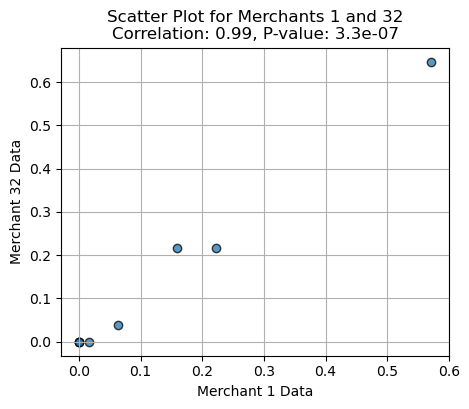

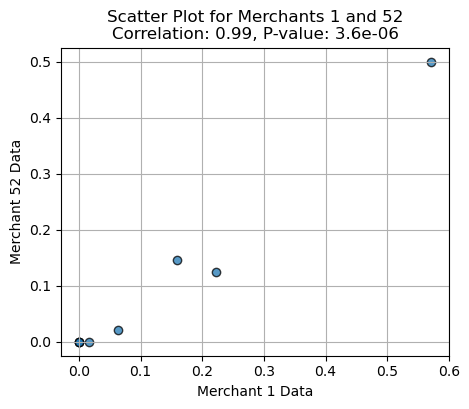

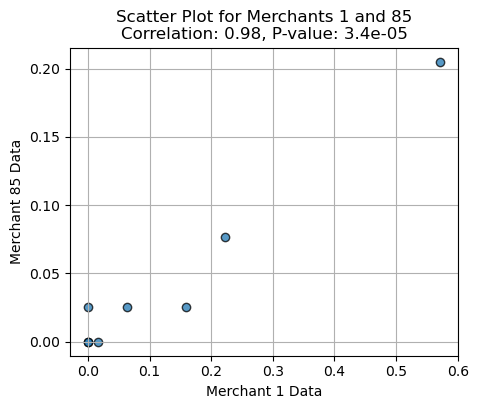

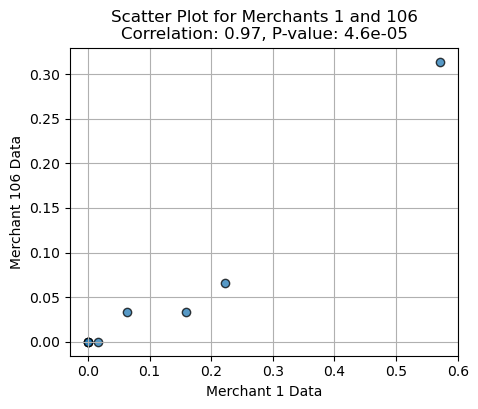

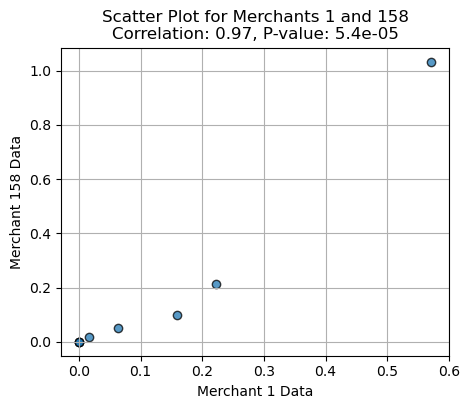

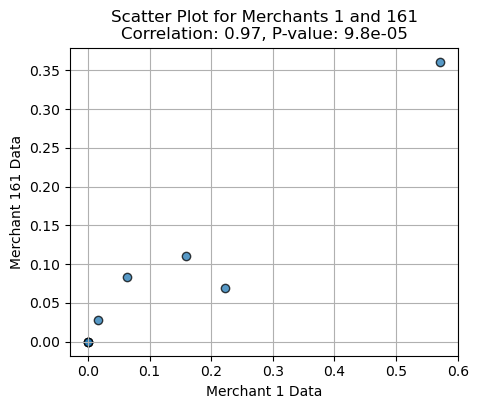

Correlation Matrix:
 [[ 1.         -0.1258035  -0.29907038 ... -0.31724098 -0.3732846
  -0.20629136]
 [-0.1258035   1.         -0.16890769 ... -0.16045149  0.23341702
   0.50467209]
 [-0.29907038 -0.16890769  1.         ... -0.2372895  -0.24557394
  -0.07057202]
 ...
 [-0.31724098 -0.16045149 -0.2372895  ...  1.          0.03738847
  -0.29740896]
 [-0.3732846   0.23341702 -0.24557394 ...  0.03738847  1.
  -0.04373735]
 [-0.20629136  0.50467209 -0.07057202 ... -0.29740896 -0.04373735
   1.        ]]
P-Value Matrix:
 [[0.         0.76659542 0.47178304 ... 0.44387783 0.36239098 0.62403731]
 [0.76659542 0.         0.68927016 ... 0.70427704 0.57797998 0.20213438]
 [0.47178304 0.68927016 0.         ... 0.5715012  0.55772609 0.86811615]
 ...
 [0.44387783 0.70427704 0.5715012  ... 0.         0.92996193 0.47436869]
 [0.36239098 0.57797998 0.55772609 ... 0.92996193 0.         0.91809699]
 [0.62403731 0.20213438 0.86811615 ... 0.47436869 0.91809699 0.        ]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Function to calculate Pearson correlation matrix and p-values for all pairs of merchants
def pearson_correlation_matrix_and_pvalues(df):
    # Number of merchants
    n = df.shape[0]
    # Initialize the correlation matrix and p-value matrix
    correlation_matrix = np.zeros((n, n))
    p_value_matrix = np.zeros((n, n))
    
    # Limit the number of scatter plots (for example, plot only for the first 5 pairs to avoid overloading)
    plot_count = 0
    max_plots = 5

    for i in range(n):
        for j in range(n):
            if i != j:
                data_i = df.iloc[i, 1:].values
                data_j = df.iloc[j, 1:].values
                correlation, p_value = pearsonr(data_i, data_j)
                correlation_matrix[i, j] = correlation
                p_value_matrix[i, j] = p_value
                
                # Plot a scatter plot for a limited number of pairs
                if correlation>0.96 and plot_count <200:
                    plt.figure(figsize=(5, 4))
                    plt.scatter(data_i, data_j, edgecolors='k', alpha=0.75)
                    plt.title(f'Scatter Plot for Merchants {i+1} and {j+1}\nCorrelation: {correlation:.2f}, P-value: {p_value:.2g}')
                    plt.xlabel(f'Merchant {i+1} Data')
                    plt.ylabel(f'Merchant {j+1} Data')
                    plt.grid(True)
                    plt.show()
                plot_count += 1
            else:
                correlation_matrix[i, j] = 1  # Self correlation is always 1

    return correlation_matrix, p_value_matrix

# Calculate the Pearson correlation matrix and p-values
correlation_matrix, p_value_matrix = pearson_correlation_matrix_and_pvalues(weights)
print("Correlation Matrix:\n", correlation_matrix)
print("P-Value Matrix:\n", p_value_matrix)
